# Analyse: problèmes avec Louvain

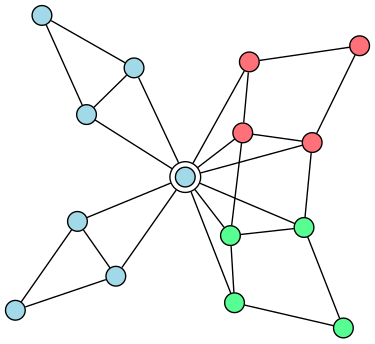

Après local move:

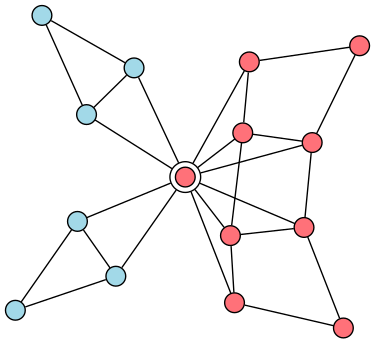

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random

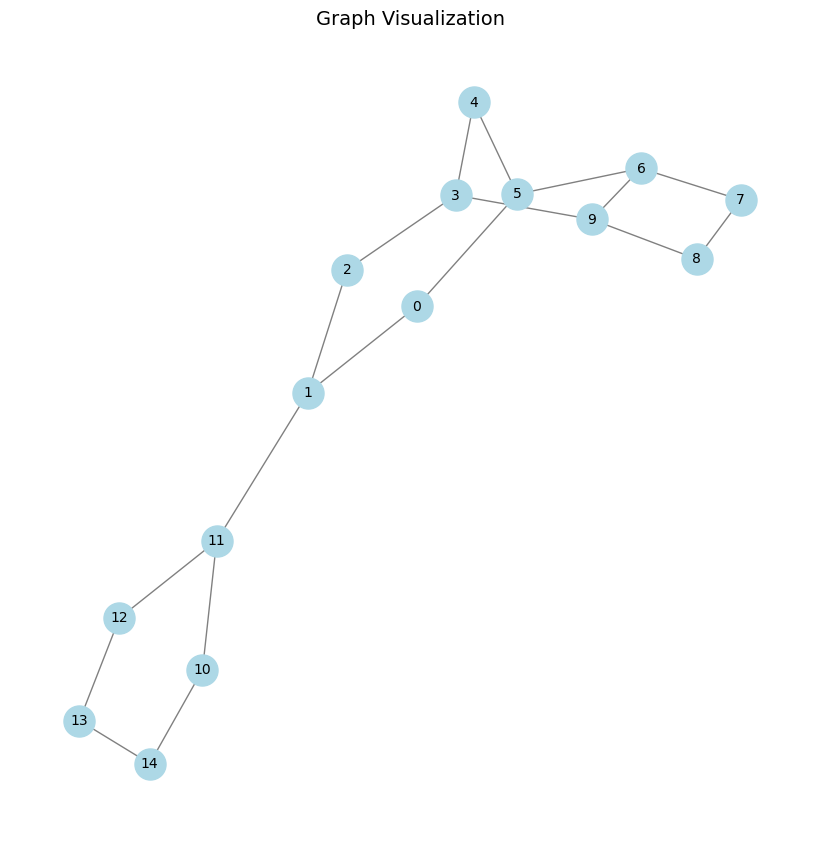

In [16]:
# Create a simple graph with 15 nodes and some edges connecting them
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),
    (6, 7), (7, 8), (8, 9), (9, 6), (3, 9), (5, 6),
    (10, 11), (11, 12), (12, 13), (13, 14), (14, 10), (1, 11)]

# Create the graph and add the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Improve the visualization with a layout and better styling
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph, seed=42)  # Use a seed for consistent layout

# Draw the graph with additional details
nx.draw(
    graph, pos, with_labels=True, node_color='lightblue',
    node_size=500, font_size=10, font_color='black', edge_color='gray'
)

# Show the graph
plt.title("Graph Visualization", fontsize=14)
plt.show()

In [24]:
communities

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 0,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 10,
 11: 10,
 12: 10,
 13: 10,
 14: 10}

/tmp/ipykernel_66714/581419344.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  edge_color='gray', cmap=plt.cm.get_cmap('viridis', len(unique_communities))


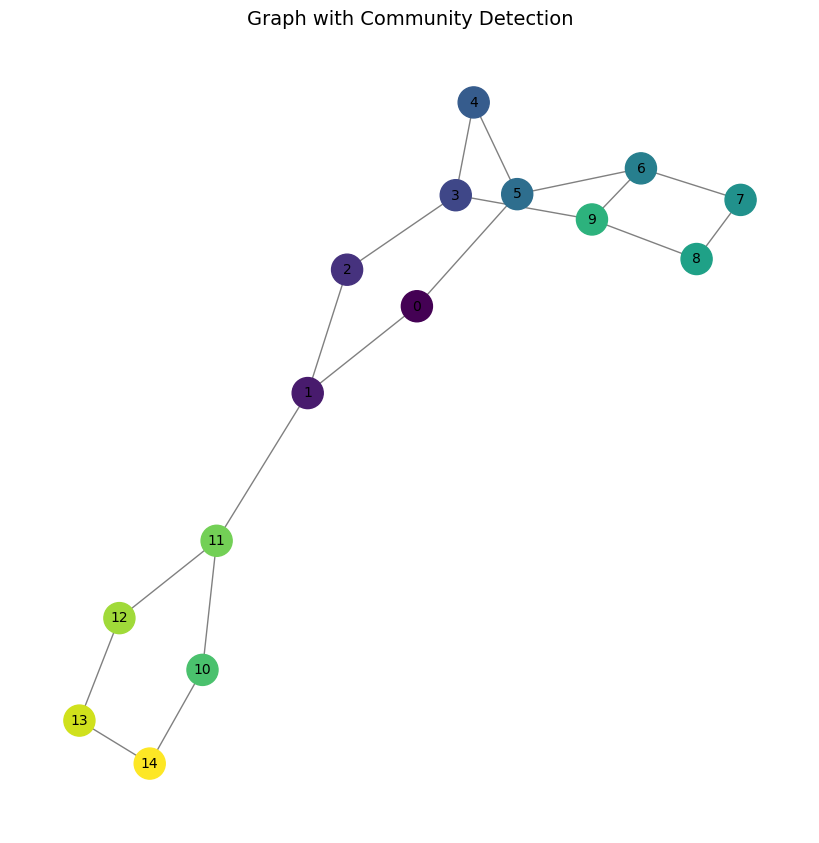

In [31]:
# Step 1: Initialize each node in its own community
communities = {node: node for node in graph.nodes()}

# Step 2: Define a function to calculate modularity gain
def modularity_gain(graph, communities, node, target_community):
    internal_edges = sum(1 for neighbor in graph.neighbors(node) if communities[neighbor] == target_community) - 1
    return internal_edges


# Step 3: Iteratively move nodes to maximize modularity
queue = list(graph.nodes())

while not len(queue) == 0:
    v = queue.pop()

    max_gain = 0
    best_community = None
    for target_community in communities:
        gain = modularity_gain(graph, communities, v, target_community)
        if gain > max_gain:
            best_community = target_community
            max_gain = gain
    
    if max_gain > 0:
        print(f"Node {v} was {communities[v]} changed to {best_community} to gain {max_gain}")
        communities[v] = best_community
        for neighbor in graph.neighbors(v):
            if communities[neighbor] != best_community and not neighbor in queue:
                queue.append(neighbor)
            

# for _ in range(10):  # Arbitrary number of iterations
#     nodes = list(graph.nodes())
#     random.shuffle(nodes)
#     for node in nodes:
#         best_community = communities[node]
#         max_gain = 0
#         for neighbor in graph.neighbors(node):
#             target_community = communities[neighbor]
#             gain = modularity_gain(graph, communities, node, target_community)
#             if gain > max_gain:
#                 best_community = target_community
#                 max_gain = gain
#         communities[node] = best_community


# Assign colors based on the community each node belongs to
unique_communities = list(set(communities.values()))
color_map = {community: i for i, community in enumerate(unique_communities)}
node_colors = [color_map[communities[node]] for node in graph.nodes()]

# Draw the graph with communities highlighted
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph, seed=42)
nx.draw(
    graph, pos, with_labels=True, node_color=node_colors, 
    node_size=500, font_size=10, font_color='black', 
    edge_color='gray', cmap=plt.cm.get_cmap('viridis', len(unique_communities))
)

# Title and display the graph
plt.title("Graph with Community Detection", fontsize=14)
plt.show()

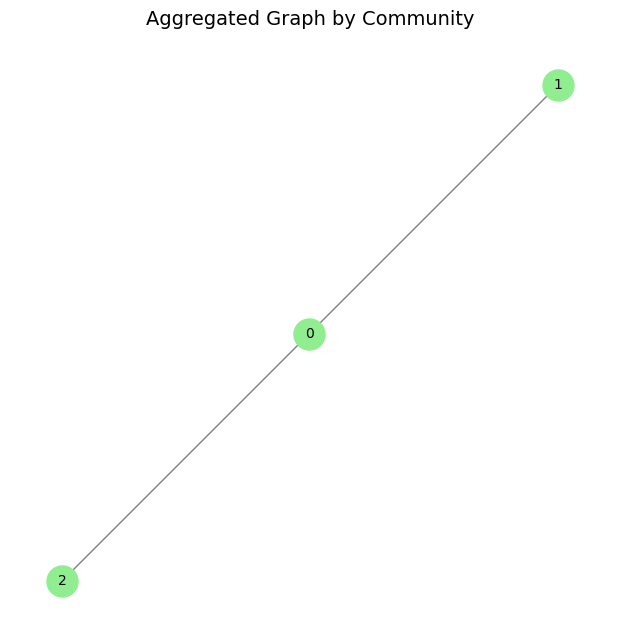

In [4]:
# Create a new graph where each community is represented as a single node
aggregated_graph = nx.Graph()
community_map = {}

# Create a mapping from community to a unique node in the aggregated graph
for node, community in communities.items():
    if community not in community_map:
        community_map[community] = len(community_map)
        aggregated_graph.add_node(community_map[community])

# Add edges between communities if they are connected in the original graph
for edge in graph.edges():
    node1, node2 = edge
    community1 = community_map[communities[node1]]
    community2 = community_map[communities[node2]]
    if community1 != community2:
        aggregated_graph.add_edge(community1, community2)

# Visualize the aggregated graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(aggregated_graph, seed=42)
nx.draw(
    aggregated_graph, pos, with_labels=True, node_color='lightgreen',
    node_size=500, font_size=10, font_color='black', edge_color='gray'
)

plt.title("Aggregated Graph by Community", fontsize=14)
plt.show()